# Evaluation matrices (binary classification)

## Setting up
- Breat cancer data
- 2 classes
- 30 features
- SVC


Classes:
- `0` = Malignant - Tumor grows rapidly, invade and destroy nearby normal tissues, and spread throughout the body.
- `1` = Benign - Tumor grows slowly and do not spread.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Breast cancer data
from sklearn.datasets import load_breast_cancer

# Load data
dataObj = load_breast_cancer()
X = dataObj.data
y = dataObj.target
print(np.unique(y))
print(X.shape)

# Visualize with dataframe
df = pd.DataFrame(data=X, columns=dataObj.feature_names)
df.insert(loc=0, column='class', value=y)
df['class'] = df['class'].map({0: dataObj.target_names[0], 1: dataObj.target_names[1]})
display(df)

[0 1]
(569, 30)


,class,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
# Class distribution
df['class'].value_counts()

benign       357
malignant    212
Name: class, dtype: int64

In [3]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.20,
    stratify=y,
    random_state=1)

# Constructing a pipeline object
pipe_svc = Pipeline([('scl', StandardScaler()),
            ('clf', SVC(random_state=1))])

## Confusion matrix

In [4]:
from sklearn.metrics import confusion_matrix

# Training
pipe_svc.fit(X_train, y_train)

# Prediction from test data
y_pred = pipe_svc.predict(X_test)

# Confusion matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[0,1])
print(confmat)

[[40  2]
 [ 0 72]]


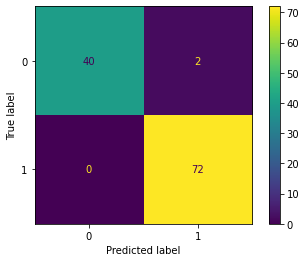

In [5]:
# Visualization
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator=pipe_svc, X=X_test, y_true=y_test, labels=[0,1])  
plt.show()

### Note 

- The class 0 samples that are correctly predicted as class 0 are now in the upper left corner of the matrix. 
- In order to change the ordering, we can use the "labels" argument.

In [6]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
print(confmat)

[[72  0]
 [ 2 40]]


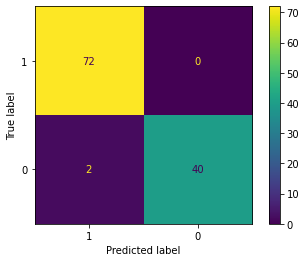

In [7]:
plot_confusion_matrix(estimator=pipe_svc, X=X_test, y_true=y_test, labels=[1,0])  
plt.show()  

## Accuracy, Precision, Recall, and F1

- Be careful with the definition of "positive" label.  In this case, we want `0` to be positive (เป็นโรค).
- Therefore, we need to set `pos_label=0` when calculating precision, recall and F1

In [8]:
from sklearn.metrics import accuracy_score, precision_score ,recall_score, f1_score

# Accuracy
ACC = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy:{ACC:6.3f}")

# Precision
PRE = precision_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"Precision:{PRE:6.3f}")

# Recall
REC = recall_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"Recall:{REC:6.3f}")

# F1
F1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"F1:{REC:6.3f}")

Accuracy: 0.982
Precision: 1.000
Recall: 0.952
F1: 0.952


## Use `precision` score in grid search

- Scoring: https://scikit-learn.org/stable/modules/model_evaluation.html
- Note that when using `scoring='precision'`, default parameters will be use, which means that `pos_label=1`.

### Incorrect 

In [9]:
from sklearn.model_selection import GridSearchCV

c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
set1 = {'clf__C': param_range, 'clf__kernel': ['linear']}
set2 = {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}
param_grid = [set1, set2]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  # This means that pos_label=1
                  scoring='precision',
                  cv=10,
                  n_jobs=-1)
                  
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9797470734678744
{'clf__C': 1000.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


### Correct

In [10]:
from sklearn.metrics import make_scorer

# Making scorer wrapper so that we can pass the desired argument.
scorer = make_scorer(precision_score, pos_label=0)

# Grid search.
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  # Use scorer here
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
                  
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

1.0
{'clf__C': 0.1, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
